In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data.csv', ',')

In [3]:
df_artists = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_by_artist.csv', ',')

In [4]:
df_genres = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_by_genres.csv', ',')

In [5]:
df_genres_backup = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_by_genres.csv', ',')

In [6]:
df_w_genres = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_w_genres.csv', ',')

In [7]:
df_artists.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965
3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965
4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921


In [8]:
df_artists.shape

(27606, 15)

In [9]:
df_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.983000,0.218500,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000,1,1
1,432hz,0.485070,0.330000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000,6,1
2,[],0.686395,0.516830,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669,7,1
3,a cappella,0.666036,0.576732,1.961439e+05,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,38.786415,11,1
4,abstract,0.352395,0.489100,3.429772e+05,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,41.600000,1,1


In [10]:
df_genres.shape

(2617, 14)

In [11]:
df_w_genres.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267,"['tango', 'vintage tango']"
1,1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068,"['classical', 'early romantic era', 'polish cl..."
2,2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965,"['classical', 'classical era', 'early romantic..."
3,3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965,"['classical', 'classical era']"
4,4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921,"['baroque', 'classical', 'early music', 'germa..."


In [12]:
(df_w_genres['genres'].map(lambda x: len(x))==0).sum()

0

In [13]:
df_w_genres.shape

(27606, 17)

In [14]:
df_w_genres.head(1)

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267,"['tango', 'vintage tango']"


In [15]:
# Drop Unnamed column
df_w_genres.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
# Convert genres from string to list 
import re
pattern = re.compile(r'\w+\s*?\w+', re.IGNORECASE)
df_w_genres['genres'] = df_w_genres['genres'].map(lambda x: re.findall(pattern, x))

In [17]:
# Change fields of no genres to None
df_w_genres['genres'] = df_w_genres['genres'].map(lambda x: np.nan if len(x) == 0 else x)

In [18]:
df_genres

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.983000,0.218500,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000,1,1
1,432hz,0.485070,0.330000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000,6,1
2,[],0.686395,0.516830,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669,7,1
3,a cappella,0.666036,0.576732,1.961439e+05,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,38.786415,11,1
4,abstract,0.352395,0.489100,3.429772e+05,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,41.600000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,zolo,0.213583,0.554535,2.610435e+05,0.622022,0.154913,0.187501,-11.429927,0.064902,124.378368,0.604476,32.895038,9,1
2613,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2614,zouk,0.322350,0.767000,2.853400e+05,0.648500,0.282500,0.091250,-11.369500,0.038800,88.988000,0.769000,34.500000,4,1
2615,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [19]:
df_w_genres[df_w_genres['genres'].isna()].sort_values('popularity', ascending=False).head(20)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
16321,THE SCOTTS,0.23300,0.7160,165978.0,0.537,0.000000,0.15700,-7.6480,0.05140,129.9790,0.280,97.0,0,0,1,NaN
25350,Surf Mesa,0.06860,0.6740,176547.0,0.774,0.001880,0.39300,-7.5670,0.08920,112.0500,0.330,92.0,11,0,1,NaN
16900,Emilee,0.06860,0.6740,176547.0,0.774,0.001880,0.39300,-7.5670,0.08920,112.0500,0.330,92.0,11,0,1,NaN
18636,A7S,0.22300,0.7890,166794.0,0.720,0.000000,0.12900,-5.6520,0.21800,122.0310,0.664,90.0,8,0,1,NaN
18569,DripReport,0.26000,0.9030,106000.0,0.327,0.011000,0.10800,-9.7270,0.08770,100.0080,0.274,90.0,1,1,1,NaN
25479,Imanbek,0.01490,0.7840,176219.0,0.721,0.004240,0.28500,-5.4570,0.05060,121.9660,0.895,87.0,8,1,1,NaN
16017,StaySolidRocky,0.74900,0.7280,147800.0,0.431,0.000000,0.09960,-9.9660,0.06220,130.0220,0.629,86.0,6,0,1,NaN
19579,Sam Fischer,0.73100,0.6020,194853.0,0.377,0.000000,0.08080,-6.2130,0.04460,73.8770,0.518,86.0,11,1,1,NaN
25214,Natalie Taylor,0.80000,0.3900,183103.0,0.448,0.182000,0.10700,-8.5700,0.02760,144.8900,0.077,83.0,5,0,1,NaN
20268,Sosa Geek,0.42300,0.5430,204805.0,0.766,0.000000,0.15500,-3.3870,0.34300,106.8690,0.729,82.0,0,0,1,NaN


In [21]:
df_w_genres.iloc[23]['genres']

['classical', 'classical performance', 'classical piano']

In [25]:
genre_dummy_df = pd.get_dummies(list(genre_list_unique))

## For NAN Genres ##

Form clusters from the df_genre dataset (how many, technique to use). Only use technical attributes (remove the duration and popularity before clustering)

Take average values of the genre clusters created

Compare them with artists without a genre in the df_w_genre dataset. Check the similarities between the clusters and the artist, and assign a cluster to them. 


## Creating Genre Clusters ##

Try All - K-Means, Hierarchical, Density
Similarity - Which measure to use? (comparing genres to artists)
Language?

In [20]:
df_genres[df_genres['genres'].map(lambda x: x.startswith('lat'))]

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
1442,late romantic era,0.931500,0.318900,307131.352381,0.178364,0.524633,0.186925,-19.350511,0.053259,99.833226,0.248331,10.448311,9,1
1443,latin,0.304348,0.689518,247753.767191,0.671345,0.019499,0.186778,-6.909830,0.087200,123.434707,0.647628,55.040916,7,1
1444,latin afrobeat,0.247390,0.638122,252648.530556,0.636817,0.010232,0.203068,-8.689969,0.091506,115.227461,0.630514,50.119444,7,1
1445,latin alternative,0.196537,0.619458,246808.804808,0.673804,0.028478,0.200337,-8.121938,0.064939,125.053799,0.633950,54.736138,7,1
1446,latin arena pop,0.294973,0.607581,246224.361242,0.625140,0.004877,0.196571,-7.085041,0.050589,125.728062,0.507676,55.714371,7,1
1447,latin christian,0.419256,0.499540,308127.000974,0.533483,0.004894,0.294786,-8.250993,0.041411,124.465088,0.364182,47.453558,7,1
1448,latin classical,0.834058,0.459252,202463.848406,0.283488,0.513229,0.129827,-16.943537,0.054724,111.706911,0.450809,17.788567,7,1
1449,latin funk,0.211304,0.603400,259966.200000,0.599425,0.009182,0.197985,-9.371750,0.044905,117.776225,0.520200,48.075000,7,1
1450,latin hip hop,0.215338,0.739361,257197.570067,0.715362,0.025724,0.210913,-6.545204,0.135665,116.014638,0.669326,52.828217,1,1
1451,latin house,0.088412,0.775400,237196.133333,0.826467,0.000174,0.090113,-9.886333,0.052993,125.553800,0.776133,45.600000,7,1


In [21]:
# Convert key and mode to categories
# Drop duration and popularity 

dummies = [pd.get_dummies(df_genres['key'], prefix='key'), pd.get_dummies(df_genres['mode'], prefix='mode')]

df_genres.drop(['popularity', 'duration_ms', 'mode', 'key'], axis=1, inplace=True)


In [22]:
df_genres = df_genres.join(dummies)

In [23]:
genre_list = df_genres['genres']
features = df_genres.iloc[:, 1:]

In [24]:
from sklearn.cluster import KMeans

In [33]:
inertias = []

for i in range(20, 500, 10): 
    kmc = KMeans(n_clusters=i, n_jobs=-1)
    kmc.fit(features)
    inertias.append(kmc.inertia_)

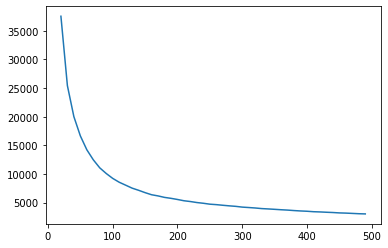

In [34]:
import seaborn as sb
sb.lineplot(x=range(20, 500, 10), y=inertias)

# Based on this, even 100 genres are enough

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

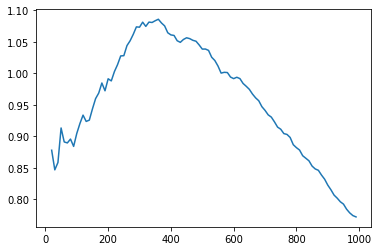

In [37]:
davies_bouldin_values = []

for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='complete')
    agc.fit_predict(features)
    davies_bouldin_values.append(davies_bouldin_score(features, agc.labels_))

sb.lineplot(range(20, 1000, 10), davies_bouldin_values)

# Values are too high. Complete linkage is not a good idea 

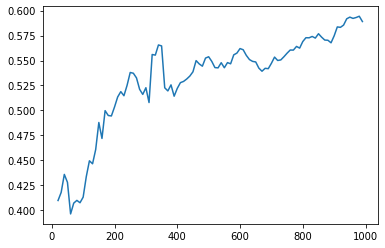

In [38]:
davies_bouldin_values = []

for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='single')
    agc.fit_predict(features)
    davies_bouldin_values.append(davies_bouldin_score(features, agc.labels_))

sb.lineplot(range(20, 1000, 10), davies_bouldin_values)

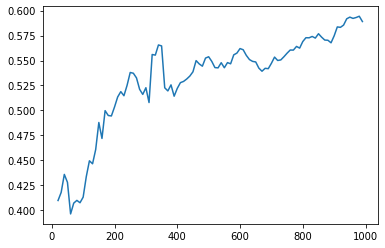

In [39]:
davies_bouldin_values = []

for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='single')
    agc.fit_predict(features)
    davies_bouldin_values.append(davies_bouldin_score(features, agc.labels_))

sb.lineplot(range(20, 1000, 10), davies_bouldin_values)

# Much better, but how much better can it be?

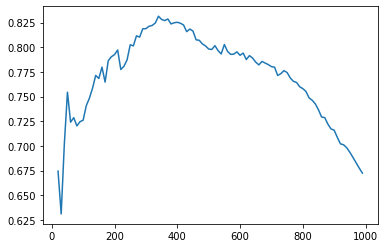

In [40]:
davies_bouldin_values = []

for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='average')
    agc.fit_predict(features)
    davies_bouldin_values.append(davies_bouldin_score(features, agc.labels_))


sb.lineplot(range(20, 1000, 10), davies_bouldin_values)

# Not good enough, stick to single linkage

In [41]:
df_genres

,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,21st century classical,0.983000,0.218500,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,...,0,0,0,0,0,0,0,0,0,1
1,432hz,0.485070,0.330000,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,...,0,0,1,0,0,0,0,0,0,1
2,[],0.686395,0.516830,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,...,0,0,0,1,0,0,0,0,0,1
3,a cappella,0.666036,0.576732,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,...,0,0,0,0,0,0,0,1,0,1
4,abstract,0.352395,0.489100,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,zolo,0.213583,0.554535,0.622022,0.154913,0.187501,-11.429927,0.064902,124.378368,0.604476,...,0,0,0,0,0,1,0,0,0,1
2613,zouglou,0.124000,0.834000,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,...,0,0,0,1,0,0,0,0,1,0
2614,zouk,0.322350,0.767000,0.648500,0.282500,0.091250,-11.369500,0.038800,88.988000,0.769000,...,1,0,0,0,0,0,0,0,0,1
2615,zouk riddim,0.052700,0.776000,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,...,1,0,0,0,0,0,0,0,0,1


In [42]:
# Put popularity back in the features
features['popularity'] = df_genres_backup['popularity']

In [43]:
features

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,popularity
0,0.983000,0.218500,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,0,...,0,0,0,0,0,0,0,0,1,40.500000
1,0.485070,0.330000,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,0,...,0,1,0,0,0,0,0,0,1,52.125000
2,0.686395,0.516830,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,0,...,0,0,1,0,0,0,0,0,1,21.556669
3,0.666036,0.576732,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,0,...,0,0,0,0,0,0,1,0,1,38.786415
4,0.352395,0.489100,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,0,...,0,0,0,0,0,0,0,0,1,41.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,0.213583,0.554535,0.622022,0.154913,0.187501,-11.429927,0.064902,124.378368,0.604476,0,...,0,0,0,0,1,0,0,0,1,32.895038
2613,0.124000,0.834000,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,0,...,0,0,1,0,0,0,0,1,0,56.000000
2614,0.322350,0.767000,0.648500,0.282500,0.091250,-11.369500,0.038800,88.988000,0.769000,0,...,0,0,0,0,0,0,0,0,1,34.500000
2615,0.052700,0.776000,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,0,...,0,0,0,0,0,0,0,0,1,24.000000


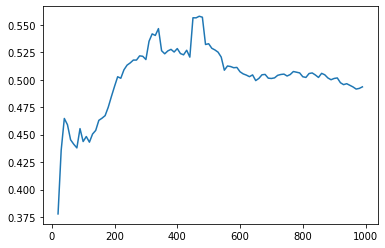

In [44]:
davies_bouldin_values = []

for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='single')
    agc.fit_predict(features)
    davies_bouldin_values.append(davies_bouldin_score(features, agc.labels_))

sb.lineplot(range(20, 1000, 10), davies_bouldin_values)

# Overall values are lower

In [45]:
np.argmin(np.array(davies_bouldin_values)) # 20 clusters seems to be optimum

0

In [46]:
# Standardize before clustering
from sklearn.preprocessing import StandardScaler

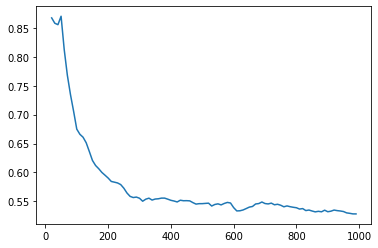

In [47]:
davies_bouldin_values = []
features_standardized = StandardScaler().fit_transform(features)
for i in range(20, 1000, 10):
    agc = AgglomerativeClustering(n_clusters=i, affinity='l2', linkage='single')
    agc.fit_predict(features_standardized)
    davies_bouldin_values.append(davies_bouldin_score(features_standardized, agc.labels_))

sb.lineplot(range(20, 1000, 10), davies_bouldin_values)
# Interestingly, standardization makes it worse. Means that popularity makes good clusters?

In [48]:
# Create a list of international genres
# int_genres = []
# int_genres.append(df_genres[df_genres['genres'].map(lambda x: x.startswith('nord'))]['genres'].values)

In [25]:
# Pairwise distances
no_genre_artists = df_w_genres[df_w_genres['genres'].isna()]

In [42]:
no_genre_artist_features = no_genre_artists[no_genre_artists.columns[no_genre_artists.dtypes=='float64']]

In [27]:
no_genre_artist_labels = no_genre_artists['artists']

In [65]:
from sklearn.metrics import pairwise_distances

In [123]:
#num_features
genre_num_features = df_genres_backup[df_genres_backup.columns[df_genres_backup.dtypes=='float64']]

In [44]:
# Standardize popularity
pop_mean = no_genre_artist_features['popularity'].mean()
pop_std = no_genre_artist_features['popularity'].std()
no_genre_artist_features.loc[:, 'popularity'] = no_genre_artist_features['popularity'].map(lambda x: (x-pop_mean)/pop_std)

/home/agastya/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
no_genre_artist_features = no_genre_artist_features.drop('duration_ms', axis=1)

In [124]:
# Standardize popularity
genre_pop_mean = genre_num_features['popularity'].mean()
genre_pop_std = genre_num_features['popularity'].std()
genre_num_features['popularity'] = genre_num_features['popularity'].map(lambda x: (x-genre_pop_mean)/genre_pop_std)

/home/agastya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
genre_num_features.drop('duration_ms', axis=1, inplace=True)

/home/agastya/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
no_genre_artist_features = np.array(no_genre_artist_features)
genre_num_features = np.array(genre_num_features)

In [83]:
x = np.array([3, 1, 2, 4, 5, 0, 23, 124])

In [90]:

x[x.argsort()]
x.argsort()

array([5, 1, 2, 0, 3, 4, 6, 7])

In [128]:
no_genre_artist_features.shape

(9550, 10)

In [129]:
genre_num_features.shape

(2617, 10)

In [150]:
artist_genre_distance = []
artist_genre_indexes = []

for artist_feature in no_genre_artist_features:
    distance_vals = []
    for genre_feature in genre_num_features:
        distance_vals.append(np.linalg.norm(artist_feature-genre_feature))
    # Take only top 10
    distance_vals = np.array(distance_vals)
    
    artist_genre_distance.append(distance_vals[distance_vals.argsort()][:10])
    artist_genre_indexes.append(distance_vals.argsort()[:10])
    

In [151]:
artist_genre_distance = np.array(artist_genre_distance)

In [152]:
artist_genre_indexes = np.array(artist_genre_indexes)

In [153]:
artist_genre_distance.shape

(9550, 10)

In [154]:
artist_genre_indexes.shape

(9550, 10)

In [137]:
artist_genre_distance

array([[0.95685324, 1.0207359 , 1.02928143, 1.05558595, 1.0868085 ,
        1.25652724, 1.33274442, 1.41778061, 1.42055608, 1.46012151]])

In [148]:
artist_genre_indexes[0]

array([ 536, 1167, 1379, 1354, 2248, 1886, 2336, 1369, 1329, 1267])

In [149]:
df_genres.iloc[artist_genre_indexes[0]]

,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
536,classic japanese jazz,0.572312,0.520258,0.400542,0.616646,0.103606,-14.955092,0.039453,116.100958,0.549532,...,0,0,0,1,0,0,0,0,1,0
1167,hula,0.792042,0.608167,0.216500,0.320935,0.162483,-15.088208,0.047029,117.124458,0.562917,...,0,0,0,1,0,0,0,0,0,1
1379,jazz violin,0.695335,0.545289,0.417936,0.367383,0.251464,-15.248233,0.076091,116.435091,0.640896,...,0,0,0,1,0,0,0,0,0,1
1354,jazz clarinet,0.811523,0.509358,0.329856,0.553684,0.217988,-14.204568,0.063804,115.992888,0.557748,...,0,1,0,0,0,0,0,0,0,1
2248,space age pop,0.711633,0.493313,0.372473,0.400191,0.175834,-13.768948,0.074476,116.013247,0.536920,...,0,0,0,1,0,0,0,0,0,1
1886,piano blues,0.788919,0.595449,0.384807,0.293656,0.165136,-13.230387,0.103405,116.413164,0.664699,...,0,0,0,1,0,0,0,0,0,1
2336,swing,0.808540,0.558647,0.321378,0.256745,0.206458,-13.240002,0.071980,116.600942,0.561626,...,0,1,0,0,0,0,0,0,0,1
1369,jazz quartet,0.709563,0.535801,0.306243,0.267844,0.220424,-15.274979,0.073166,115.719195,0.509309,...,0,1,0,0,0,0,0,0,0,1
1329,japanese jazz,0.434559,0.560892,0.462438,0.448997,0.129663,-13.746334,0.040517,115.410073,0.628602,...,0,0,0,1,0,0,0,0,0,1
1267,israeli rock,0.553009,0.584895,0.448259,0.001479,0.107149,-13.444922,0.063917,116.059737,0.545398,...,0,0,0,1,0,0,0,0,0,1


In [137]:
import pickle
with open ('distances', 'wb') as f:
    pickle.dump(artist_genre_distance, f)

In [130]:
np.sort(np.array(artist_genre_distance))

array([[131.60199809, 132.17960477, 134.04661308, 134.43815076,
        134.60512865, 135.67930024, 136.03040721, 136.29559158,
        136.43325723, 136.59249651]])

In [111]:
np.array(artist_genre_distance).so

(1, 2617)

In [85]:
no_genre_artist_features.shape

(9550, 9)

In [89]:
pairwise_distances(no_genre_artist_features, genre_num_features).shape

(9550, 2617)